<a href="https://colab.research.google.com/github/codestates/ds-cs-section4-sprint3/blob/main/N432/ds_cs_N432_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 3 / NOTE 2*

--- 
# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM) (Prepare)




<!-- <img src="https://media.giphy.com/media/l2JJu8U8SoHhQEnoQ/giphy.gif" width=480 height=356>
<br></br>
<br></br> -->

# Warm Up
- 걱정마세요, DS1기, [지나간 것은 지나간대로 그런 의미가 있죠](https://youtu.be/nPXkNi4C5AQ)
- [RNN, LSTM 원리 소개 영상](https://youtu.be/SoNtAjxA3Jo?t=116)
  * Vanishing Gradient 개념을 이해하고, 그것을 극복하기 위해서 한 것은?
  * Gate의 개수와 범위는?
- [GRU 소개영상](https://youtu.be/cs3tSnAsyRs?t=2569)
  * Gate의 수를 줄일 수 있지 않을까? LSTM과의 차이는?
  * Reset/Update Gate - Vanishing Gradient 를 해결한 방법이 어떻게 달라졌나?
- 신호처리(음성, 사진, 동영상)의 개념 [DSP강의](http://www.kocw.net/home/search/kemView.do?kemId=334394&ar=relateCourse)(이런 게 있다... 강의를 듣진 마세요. 나중에 관련 업무를 하게되고 충분한 시간이 있을 때면 봐도 좋습니다)
  * 분석(analysis) - 레이더(RADAR, RAdio Detection And Ranging), 소나(SONAR, SOund NAvigation Ranging), 
  * 처리(processing)
  * 합성(synthesis)
  
- Review
  * Convolution의 개념
  * Pooling의 개념
  * Convolution Layer의 filter의 개념
  * 분류기로 사용한 CNN의 개념
  * 전이학습(Transfer learning)을 활용하는 개념

# 🏆 학습 목표

- <a href="#p1">Part 1: </a>시퀀스 모델링에 사용되는 신경망에 대해서 배운다.
  * 시퀀스 : 순서가 있는 데이터의 집합
  * RNN 계열 (LSTM, GRU 포함)과는 다른 시퀀스 처리 방식인 Transformer에 대해서 알고 있다.
- <a href="#p2">Part 2: </a>Keras를 사용하여 텍스트 생성 문제에 LSTM 적용해본다.
  * RNN을 실전문제에 사용해보았고, RNN도 기존 신경망과 다르지 않고 충분히 해결할 수 있다는 자신감을 갖는 것. 

## 들어가기

이전까지 신경망의 개념에서와 CNN에서의 전체적은 흐름은 비슷하였습니다. 흐름이 한 방향으로만 흐르는 피드포워드(Feed Forward, FF)인 신경망들이었습니다. 물론 신경망을 학습할 때에는 역방향으로 움직이는 역전파에 대해서 배웠지만, 이것은 학습하는 과정이었기 때문에 신경망을 실제로 사용할 때에는 순방향으로만 사용하였습니다. 입력 신호가 은닉층으로 전달되고, 또 다음 층으로 전달하고 이렇게 순차적으로 전달해왔습니다.  이렇게 FF는 구성이 단순하여 이해하기 쉽지만, 큰 단점이 하나 있습니다. 바로 시계열(순서의 패턴에 의미가 있는) 데이터를 다루지 못합니다. 기존에 우리가 다뤘던 네트워크의 구조가 시계열 형태의 패턴을 잡아내지 못하기 때문입니다. 그래서 오늘은 시계열의 데이터 성질(패턴)을 잡아낼 수 있는 순환신경망(RNN)에 대해서 배워보겠습니다.

시계열 데이터, 다른 말로 `시퀀스`는 열거 된 데이터입니다. 우리 일상에서는 `주문` 등의 반복적인 작업들이 이에 해당됩니다. Python 리스트(List)가 시계열 데이터의 좋은 예라고 할 수 있습니다. 두 개의 리스트 `[1, 2, 2, -1]`은 `[1, 2, -1, 2]`는 서로 다르다는 것입니다. 내용의 집합은 동일하지만, 순서가 다르면 다른 데이터가 될 수 있습니다. 이렇게 우리가 사용하는 데이터 구조 (예 : NumPy 배열)는 종종 이런 기본구조를 기반으로 구축되어 있죠.

일상생활에서 대표적인 예는 바로 우리의 '말'이죠. 말의 순서가 중요하죠. 문법이 그러한 법칙을 담고 있습니다. 이렇게 시계열 데이터는 순서뿐만 아니라 "시간" 축이라는 마커(표시)가 있는 데이터입니다. 날짜, 타임 스탬프, [Unix 시간](https://en.wikipedia.org/wiki/Unix_time) 등. 모든 시계열은 또한 시퀀스이며 일부 기술의 경우 항목이 "얼마나 멀리 떨어져 있는지"를 고려하기도 하고, 단순히 순서만 고려할 수 있습니다 (특히 일정한 간격으로 수집 된 데이터가 특히 일관된 경우 중요하지 않을 수 있음). 오늘 배울 기본적인 RNN의 경우는 `얼마나 멀리 떨어져 있는가`보다 `순서`가 더 중요할 수 있습니다. RNN은 먼 데이터를 기억조차 하지 못하기 때문이죠. 기본적인 개념을 배우고 나면, 꽤 먼 거리에 있는 데이터를 배울 수 있는 LSTM에 대해서도 배워볼 것이고, 시계열을 다루지만 RNN을 사용하지 않는 Attention Network에 대해서도 간단하게 배워볼 것입니다. 




그렇다면, RNN의 계열은 기존의 CNN과 무엇이 다를까요? <br>
구조는 다를 수 있지만, 학습되는 원리는 똑같습니다. <br>
기존에도 순차적으로 계산을 하긴 했지만, 실제로 코드에서 보면, 동시에 진행해도 큰 문제는 없습니다. 그러나 RNN의 경우는 순서가 바뀌면 결과가 바뀌기 때문에 업데이트를 순차적해야 합니다. 그래서 기존의 네트워크에 비해서 학습 시간이 조금 더 오래 걸립니다. <br>
아래 예시를 한번 살펴보죠

<img src="http://i.imgur.com/Xtpgxzu.gif" />

# 확률과 언어모델 Review


## Word2Vec

단어를 Vector공간으로 변환시키는 방법이라고 배웠고, 의미를 되새기기 위해서 그림을 참조하면 다음과 같습니다. 
<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png"/>

 한편, 수식적으로 이라는 단어데이터를 생각해보겠습니다.<br>
> $w_1, w_2, w_3, ..., w_l$ 


 $w_l$을 `target`으로 예측해야한다고 했을 때, 기존의 맥락(context)과 이후 맥락을 반영해야겠습니다. <br>

 > $P(w_{l} | w_{l-1}, w_{l+1}$)

CBOW는 위 식의 사후확률을 나타냅니다. 좌우를 고려하지 않고, 좌측(과거)만 고려하면, 

 > $P(w_{l} | w_{l-1}, w_{l-2}$)

 이렇게 식을 만들어볼 수 있습니다. 이런 모델의 형태는 머신러닝이나 통계학에서 마르코프체인(Markov Chain)으로 다뤄지기도 합니다. 위 수식은 level2 마르코프체인이 되는 것입니다. 과거 2개만을 고려했다는 의미이죠. 이렇게 파라미터의 조절을 통해서 기존 머신러닝에서 다뤘던 내용들을 Word2Vec 충분히 커버할 수 있습니다. 이후 단어와 과거로 단어로부터 몇개씩 고려할 것인지도 하나의 하이퍼파라미터로 조절하는 것이죠. 이 변수를 과거를 $k$, 이후를 $j$라고 한다면, $k=2, j=0$인 경우를 다룬 것이고, $k=3, j=1$이라면 식은 다름과 같이 변경될 수 있는 것입니다.

  > $P(w_{l} | w_{l-1}, w_{l-2}, w_{l-3}, w_{l+1}$)

## 확률적 언어모델(Language Model)

> $P(w_1, ..., w_m) = P(w_m|w_1, ..., w_{m-1})P(w_{m-1}|w_1, ..., w_{m-2})...P(w_2|w_1)P(w_1)$

이렇게 최근에 나온 단어가 나오기까지의 사후확률은 위와같이 분해해서 쓸 수 있습니다. 이 확률은 동시에 연속적인 사건의 발생임으로 독립확률의 곱으로 동시확률을 나타냅니다. 

축약해서 하나의 기호로 쓰면 다음과 같습니다.
> $\prod _{t=1}^{m} P(w_t | w_1, ..., w_{t-1})$

이렇게 모델링한 것을 기준으로 다음 단어를 예측하게 되는 것입니다.

# 시퀀스를 위한 신경망

## RNN
"전통적인" 시계열 처리 방법은 많은 것(예, Markov Chains)들이 있지만 딥러닝 시대에 접어들면서 시퀀스 데이터에 대한 기술은 RNN으로 집중되었습니다. 기본적인 신경망에 재귀(recurrent)연결을 두면서 시간축 정보를 반영할 수 있도록 만든 구조입니다. 여기서 recurrent라는 단어는 라틴어에서 유래되었는데 '몇 번이나 반복해서 일어나는 일'이라는 뜻입니다. 우리말로는 '재발하다, 주직적으로 일어나다, 순환하다'는 의미로 번역될 수 있습니다.  따라서 오늘 배울 RNN은 무엇인가 순환하는 신경망이라는 것을 마음에 담고 시작해보겠습니다. 

시퀀스 데이터의 간단한 예시를 들어보겠습니다. `피보나치 수열`을 기억하십니까? 이전과 전전 단계의 합산으로 새로운 수열이 만들어지는 구조입니다. 앞서 언급된 2nd markov Chain도 이런 방식으로 $n-2$단계와 $n-1$단계로 $n$ 단계가 정해지는 예시를 들었는데 그 중에 둘의 합으로 표시하는 방법입니다. 이렇게 모델이 정해지면 다음으로 나올 무수히 많은 숫자들을 만들 수 있다는 이론에 근거합니다. 

> $F_n = F_{n-1} + F_{n-2}$

수학공식의 경우 기본 케이스 $ F_0 = 1, F_1 = 1 $라는 최초 입력이 필요하며 나머지는 알고리즘에 의해서 생성됩니다. 그러나 우리가 신경망에서 다룰 것은 루프(loop)형태를 다루게 됩니다. 그림으로 설명하면 다음과 같습니다.


![RNN, Recurrent neural network](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

화살표 왼쪽 그림에서 $h$ 라고 쓴 은닉층에 자기 자신의 입력으로 돌아가는 Edge $V$이 있습니다.이 루프는 지금 시점의 $t$의 출력을 위해서 $t-1$ 값이 $U$와 합쳐져 $h$에 다시 반영되는 것을 의미합니다. 

전체 네트워크가 왼쪽 그림처럼 표시되지만, 네트워크를 시점에 따라 이해하도록 펼쳐보면 오른쪽 그림처럼 주어진 $t-1$ 시점에서 $x_{t-1}$, $t$ 시점에서 $x_{t}$에서 그리고, $t+1$시점에서 $x_{t+1}$에서 어떻게 작동하는지 확인할 수 있습니다.





각 시각의 RNN 계층은 그 계층으로의 입력과 1개 전의 RNN 계층으로부터 출력을 받아들입니다. 이 두 데이터로 지금 시각의 출력을 다시 계산하게 됩니다. 
> $h_t = sigmoid(h_{t-1}W_h + x_tW_x + b)$

와 같은 형태로 계산할 수 있습니다. 이렇게 간단한 수식으로 변화내보면 조금 더 이해하기가 쉽습니다.  가중치가 2개가 생긴 것이죠. 입력 x를 h로 변환하기 위한 $W_x$와 RNN의 은닉층의 출력을 다음 h로 전환해주는 $W_h$가 있는 것입니다. 신경망에서 bias도 있다는 것은 잊지 않으셨으리라 생각합니다. 

In [ ]:
# 배웠던 RNN을 간단한 코드로 살펴보면 다음과 같습니다. 
import numpy as np

class RNN:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev):
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
    h_next = np.sigmoid(t)

    self.cache = (x, h_prev, h_next)
    return h_next

개념을 설명할 때에는 복잡하고 어려워 보였지만, 코드로 구현하고 나면 사실 별 다른 게 없습니다. 쉽게 개념을 이해하고 넘어가시면 됩니다. RNN에서의 학습도 기존 신경망처럼 계산할 수 있는데, Backpropagation through time이란 표현을 이용하여 BPTT라고합니다. 순서대로 하나씩 계산을 할 수 있습니다. 

여기서의 문제점은 $V$의 반복이 문제가 됩니다. 만약 이 Recurrent가 100회, 1000회 반복된다고 보면, $V$의 100제곱, 1000제곱이 식 내부로 들어가게 될 것입니다. 1.1의 10제곱만해도 2.85배로 커지게 됩니다. 이렇게 발산하게되는 문제가 발생하게 되고, 한편 0.9의 제곱식을 고려하면, 무수히 작아지는 것을 볼 수 있습니다. 

>$V$의 크기를 적절하게 조절해주면 되지 않을까? 

라는 생각이 들기 시작합니다. 이렇게 $V$의 크기를 조절하는 Gate를 만들어서 적절히 조절해주면서 RNN을 조절해보자는 개념에서 출발한 것이 바로 LSTM입니다. 

## LSTM
이렇게 **RNN에 Gate를 추가한 모델을 LSTM**이라고 합니다. 요즘에는 단순한 RNN은 사용하지 않고 대부분 장기 단기 기억 장치 (LSTM)를 사용합니다.  지칭하는 이름 자체가 변하기도 하였는데요, 요즘 RNN이라고 하면 당연히 LSTM이나 이후에 배울 GRU를 지칭할 정도로 LSTM이 대표적인 RNN의 모델이 되었습니다. 오히려 전에 배운 RNN을 `기본적인 RNN`이라고 표현하기도 합니다. 

아래 그림은 그 단위 모듈에 대한 예시입니다.

"무언가 복잡해 보입니다. 한 블럭 안에서 많은 일이 진행되고 있습니다. 블럭 하나 안에 작은 신경망이 들어있다고 생각하시면 조금 쉽게 이해할 수 있습니다. 기존 신경망의 학습(역전파)에 대해서 배우며 기울기의 미분에 의해서 학습되는 개념을 배웠는데, 이 블럭 속에서도 같은 원리가 적용되며 역전파를 설계할 수 있습니다. 그러면 이 변화가 RNN과는 무엇이 다른가? 

**LSTM의 장점은 그 이름인 Long Short Term Memory 처럼 최근(short) 이벤트에 더 많은 비중을 둘수도 있으면서 동시에 오래된 (long) 정보를 완전히 잃지 않을 수 있다는 것**입니다. 과거 정보를 얼마나 유지할 것인지(forget gate), 새로 입력된 정보는 얼마만큼 활용할 것인지(input gate), 그리고 두 정보를 이용하여 얼마만큼 출력을 할 것인지(output gate)를 통해서 3가지 Gate의 비율만큼 정보를 끌어다가 쓸 수 있는 모델을 만들어낸 것입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F9905CF385BD5F5EC027F20"/>

위에서도 언급했지만, 충분한 반복(iterations) 후에 일반적인 신경망의 값이 너무 작아서 gradients가 제대로 전파되지 못하고, 0으로 수렴하는 문제(vanishing gradient)가 발생합니다. **[Gradient Vanishing 문제](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)라고 하며, RNN의 대표적인 문제로 유명합니다. 그것을 개선하기 위해서 LSTM의 gate들이 생겼다고 보실 수 있습니다.** 일상 생활의 예를 들어보면, 업무 대화를 하던 중에, 12시가 되면 Forget Gate를 빠르게 동작시켜서, 일 얘기를 중단하고 갑자기 점심을 뭐 먹을 지 생각하게 되고, 업무의 모든 것을 빠르게 잊어버리고 음식을 찾아 떠나게 만드는 역할을 수행하는 것입니다. 


점심시간이면 점심을 먹어야 한다고 알려주는 머신이라면 꽤 괜찮지 않습니까? LSTM을 사용하는 특히 매력적인 애플리케이션이 바로 언어 모델링입니다. 언어는 본질적으로 정렬 된 시퀀스 데이터입니다 (문자 / 단어가 차례로 이동하고 순서가 * 중요합니다 *). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectness/)에 대해서는 한번 읽어보시면 좋습니다. 

LSTM 역전파 

<img src="http://i.imgur.com/2BZtc2l.gif" />

## GRU
Gated Recurrent Unit, GRU
한편, 이 LSTM의 간소한 버전인 GRU도 가볍게 소개합니다. 
구조를 살펴봅시다. 
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99F0EC3E5BD5F6460255CF"/>

- LSTM Cell에서의 두 상태 벡터 $c_t$ ​와 $h_t$​가 하나의 벡터 $h_t$​로 합쳐짐.
- 하나의 Gate controller인 $z_t$가 forget, input gate를 모두 제어하며,  $z_t$가 1을 출력하면 forget 게이트가 열리고, input 게이트가 닫히며, $z_t$가 0이면, 반대로 동작함.
- GRU 셀은 output 게이트가 사라짐. 전체 상태 벡터 $h_t$가 각 시각에서 출력되며, 이전 상태의 $h_t-1$의 어느 부분이 출력될 지 새롭게 제어하는 Gate controller인 $r_t$이 있음.




이제부터 TensorFlow와 Keras를 사용하여 자연어로 RNN을 훈련시켜 보겠습니다.

- https://www.tensorflow.org/guide/keras/rnn
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
- https://keras.io/api/layers/recurrent_layers/lstm/
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

여기 `tensorflow.contrib` [RNN/LSTM 예시](https://www.tensorflow.org/tutorials/sequences/recurrent).

## 따라해봅시다!
시퀀스는 주가부터 텍스트까지 다양한 모양과 형태로 제공됩니다. 우리는 주로 텍스트에 초점을 맞춰 공부하도록 하겠습니다. 왜냐하면 텍스트를 시퀀스로 모델링하는 것은 신경망의 강점이기 때문입니다. 먼저 TensorFlow 튜토리얼을 사용하여 간단한 분류 작업부터 시작하겠습니다.

### 1. Keras를 이용한 RNN/LSTM 감정분류(Sentiment Classification)

In [ ]:
'''
# IMDB 감성 분류 작업에 대한 LSTM 모델을 학습합니다.
데이터 집합이 사실 너무 작아서 LSTM이 강점을 발휘할 수 없습니다.
TF-IDF + LogReg와 같은 간단하고 빠른 방법이 LSTM에 비해 훨씬 빠릅니다.
**Notes**
- RNN은 까다롭습니다. 배치 크기 선택이 중요하고, 손실 및 최적화 도구 선택이 중요합니다. 일부 구성은 수렴되지 않을 것입니다.
- 교육 중 LSTM 손실 감소 패턴은 CNN/MLP/etc에서 보는 것는 상당히 다를 수 있습니다.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imd

# 이 단어 랭크 수 뒤에 텍스트는 사용하지 않도록 잘라냅니다(단어 등장 순위 : max_feature)
# 참조링크 : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data
max_features = 20000
# 최대 단어 길이
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [ ]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [ ]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [ ]:
import tensorflow as tf

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
unicorns = model.fit(x_train, y_train,
          batch_size=batch_size, 
          epochs=3, 
          validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 263s 337ms/step - loss: 0.4315 - accuracy: 0.7940 - val_loss: 0.3762 - val_accuracy: 0.8362
Epoch 2/5
782/782 [==============================] - 263s 336ms/step - loss: 0.2586 - accuracy: 0.8971 - val_loss: 0.4020 - val_accuracy: 0.8347
Epoch 3/5
782/782 [==============================] - 264s 338ms/step - loss: 0.1669 - accuracy: 0.9374 - val_loss: 0.4462 - val_accuracy: 0.8284
Epoch 4/5
  3/782 [..............................] - ETA: 2:39 - loss: 0.1435 - accuracy: 0.9375

KeyboardInterrupt: ignored

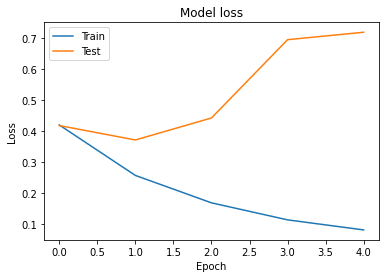

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

### 2. LSTM 텍스트 생성기 with Keras

LSTMs로 무엇을 할 수 있을까요? **시퀀스**를 분석하고 있기 때문에, 우리는 분류 이상의 것을 할 수 있습니다. 

다음 텍스트를 **생성**할 수 있습니다. 
**니체(Friedrich Nietzsche)의 글** 을 이용해서 실습을 해봅시다

Keras [LSTM text Generation](https://keras.io/zh/examples/lstm_text_generation/).

In [ ]:
# 라이브러리, 데이터 불러오기
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

corpus length: 600893
total chars: 57


In [ ]:
# max length를 이용하여 문자열의 크기 정렬
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 200285
Vectorization...


In [ ]:
# LSTM 모델 제작
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])

Epoch 1/60
1556/1565 [============================>.] - ETA: 0s - loss: 1.4330
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "s
of opposite kinds: in a remarkable sch"
s
of opposite kinds: in a remarkable scholorary of the subjection and problem of the part of the problem of the same to an experience of the consequently and the order to him and something and sentiment and standard of the consideration of the soul and a problem of the subjection and problem of the subjection and some will and a suprival and and subjection of the more and a subjection and struct and existence of the subjection of the co
----- diversity: 0.5
----- Generating with seed: "s
of opposite kinds: in a remarkable sch"
s
of opposite kinds: in a remarkable schopenhauer of the them of the certain and age is a god of certain every on the principle to be the and is the individual in the ancient the and fame and also the consequenced and cases and such a supreal, and a full for 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


as profound "wh
become would be also userwandne and and tastes easier is man": 
ediously out"ly distinent in thou
aipsical 
1565/1565 [==============================] - 66s 42ms/step - loss: 1.2828
Epoch 32/60
1557/1565 [============================>.] - ETA: 0s - loss: 1.2781
----- Generating text after Epoch: 31
----- diversity: 0.2
----- Generating with seed: "inted with solitude, and what is most po"
inted with solitude, and what is most power of the sense of the state of the same time that the considered that is the subject and contradictors of the state of the strength of the present and delight to the standarty of the subject, as the subject of the stark of the subject and actions and acts of the sense of the strength of the state of the state in the sense of the strength of the prosises of the strength of the most subject. there
----- diversity: 0.5
----- Generating with seed: "inted with solitude, and what is most po"
inted with solitude, and what is most powerful and sacrific

# Transfromer (심화 학습)
Attention이라는 개념을 사용하여 시계열 데이터를 처리하는 방법입니다. 위에서 배운 3가지의 개념은 모두 RNN을 기반으로 하고 있습니다. 문장에 여러가지 단어가 있으면 한 단어 한 단어를 신경망에 넣고 다음을 예측하는 시퀀스 처리 방식을 가지고 있다면, 이 Transformer/Attention은 문장을 한번에 넣는데, 순서정보를 입력해주는 것입니다.  "나는 머신러닝을 배우고 있다"라는 단어를 넣는다고 하면 "나는(0) 머신러닝을(1) 배우고(2) 있다(3)"을 넣어주고 처리하는 방식입니다. 이번 강의에서는 이 내용을 소개하진 않습니다. 그러나 시퀀스를 처리는 데 Transformer라는 개념이 사용된다는 것을 알고 넘어가는 것이 중요합니다.  시간이 있으신 분들은 이 개념을 배워두시면, 실무에 가셔서 바로 적용이 가능합니다. 이에 대한 [유튜브 강의](https://youtu.be/FeEmmylAF0o?t=310)를 소개합니다. GPT라는 Transformer를 기반으로한 네트워크에 대한 설명의 일부인데 수업 중에서는 이정도로만 알고 넘어가시면 되겠습니다. 


# Review

- <a href="#p1">Part 1: </a> 시퀀스 모델링에 사용된 신경망 예
        - 시계열 데이터 (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation 등
    * LSTMs, GRU가 일반적으로 대부분의 문제에서 RNN보다 선호됩니다.
    * 최근에는 LSTM, RNN 외에도 Attention(Transformer)을 이용한 모델을 이용하여 시퀀스 데이터를 다루고 있습니다. 

- <a href="#p2">Part 2: </a> Keras를 사용하여 텍스트 생성 문제에 LSTM 적용
     * 입력 데이터의 형태가 매우 중요
     * 훈련하는 데 시간이 다소 많이 걸림 
     * 영화 대본, 창작 업무에 사용가능 (GPT를 이용한 창작, 생각공유가 이슈가 되고 있음)

## 읽어볼 자료 (참고자료)
- 음성을 텍스트로 변환시키는 기술 [LAS with attention 논문](https://https://arxiv.org/abs/1508.01211), [블로그 버전](https://https://kaen2891.tistory.com/30)
- 텍스트를 음성으로 변환하는 기술 [Tacotron 블로그](https://https://hcnoh.github.io/2018-12-11-tacotron)
